# Figure 5

In [2]:
import sys
sys.path.append('..')
sys.path.append('../graybox')

from db import *
from analysis import *
from information_theory import find_best_split, remove_outliers_iqr

In [3]:
df = (
    pd.read_csv('../../datasets/graybox/graybox_attack_stats.csv')
)

stats = [
    "dalle_tool_time",
    "total_time",
]
stat = stats[1]
model = "gpt-4o"

rate_limit = (
    df
    [df["response_type"] == "dalle-rate-limit"]
    [df["model_slug"] == model]
    # .pipe(remove_outliers_iqr, stat)
    [stat]
)
issues = (
    df
    [df["response_type"] == "dalle-issue"]
    [df["model_slug"] == model]
    .pipe(remove_outliers_iqr, stat)
    [stat]
)
policy = (
    df
    [df["response_type"] == "dalle-content-policy"]
    [df["model_slug"] == model]
    .pipe(remove_outliers_iqr, stat)
    [stat]
)

Removed 1 outliers from column 'total_time'
Removed 2 outliers from column 'total_time'


/tmp/ipykernel_1238793/2635247644.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df
/tmp/ipykernel_1238793/2635247644.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df
/tmp/ipykernel_1238793/2635247644.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df


Using optimal split: 6.1202170848846436 (information_gain = 0.17372640338854772)


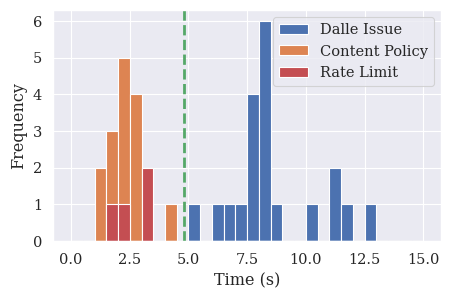

In [4]:
X = np.array(
    [[i] for i in list(df["prompt_revision_time"])]
    + [[i] for i in list(df["total_time"])]
)
Y = np.array(
    ["revising" for _ in range(len(df["prompt_revision_time"]))]
    + ["dalle" for _ in range(len(df["total_time"]))]
)
best_feature, best_value, best_gain = find_best_split(X, Y)
print(f"Using optimal split: {best_value} (information_gain = {best_gain})")

fig, ax = plt.subplots(figsize=(5,3))

fixed_range = (0, 15)
ax.hist(issues, bins=30, label="Dalle Issue", color=palette[0], range=fixed_range)
ax.hist(policy, bins=30, label="Content Policy", color=palette[1], range=fixed_range)
ax.hist(rate_limit, bins=30, label="Rate Limit", color=palette[3], range=fixed_range)
ax.axvline(x=4.8, color=palette[2], linestyle="--", linewidth=2)

ax.set_xlabel("Time (s)")
ax.set_ylabel("Frequency")

ax.legend()

plt.show()